In [63]:
# import copy
# from datetime import datetime
# import os
# import pickle
# import sys
# import time
# sys.path.append('/home/diego/python/generative-glm/experiments/')
# # sys.path.append('/home/diego/Dropbox/hold_noise/mpl_styles/')

# import h5py
# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
# import scipy.io
import seaborn as sns
# import torch
# from torch.optim import Adam
# # import seaborn as sns

# from gglm.glm.cimmdglm import CIMMDGLM
# from gglm.glm.torchglm import TorchGLM
# from gglm.metrics import bernoulli_log_likelihood_poisson_process, time_rescale_transform
# from gglm.utils import shift_array

# from kernel.fun import KernelFun
# from kernel.rect import KernelRect
# from kernel.values import KernelBasisValues

# from sptr.sptr import SpikeTrain

# from signals import auto_covariance

# import myplt

# %load_ext autoreload
# %autoreload 2

# import matplotlib as mpl
# from nips import *
# for key, val in paper.items():
#     mpl.rcParams[key] = val
# palette = dict(d='C0', ml='C2', mmd='C1', chen='C4', l2='C9')

In [64]:
df = pd.read_json('/home/diego/storage/generative-glm/experiments/figure3/monkey_pmv/' + 'df_mmd.json')

In [65]:
fr_train = 24

In [66]:
df.n_batch_fr.unique()

array([ 60, 120])

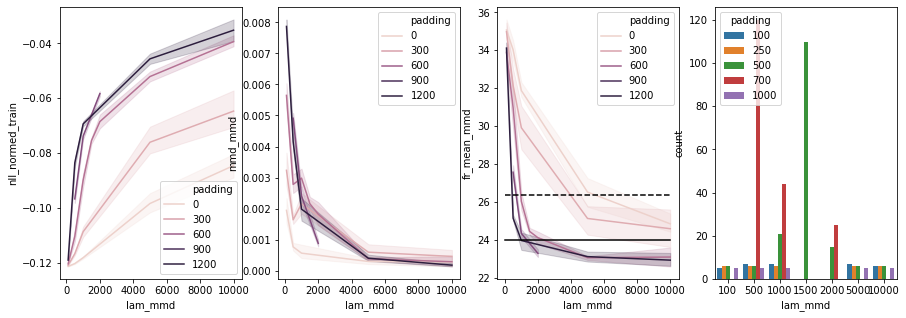

In [67]:
data = df.copy()
data = data[(data.beta1 == 0) & (data.num_epochs == 400) & (data.n_batch_fr == 60)]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15, 5), ncols=4)
sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='padding', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='mmd_mmd', hue='padding', ci=95, data=data, ax=ax2)
sns.lineplot(x='lam_mmd', y='fr_mean_mmd', hue='padding', ci=95, data=data, ax=ax3)
sns.countplot(x='lam_mmd', hue='padding', data=data, ax=ax4)
ax3.plot([0, 1e4], [fr_train, fr_train], 'k-')
ax3.plot([0, 1e4], [fr_train * 1.1, fr_train * 1.1], 'k--')